# Introduccion a la Visualizacion de datos con Python
(Intro no exahustiva)

Links utiles:
* https://gilberttanner.com/blog/introduction-to-data-visualization-inpython/
* https://github.com/stefmolin/python-data-viz-workshop/tree/main/notebooks
* https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-data-visualization-in-python/
* https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py

Se levantan las librerias a utilizar

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Scatter plot

Global Temperature Time Series

GISS Surface Temperature (GISTEMP) 

Climate at a Glance (GCAG)

Data soruce: https://datahub.io/core/global-temp#data

In [4]:

temp = pd.read_csv('./external_data/Global_Temperature.csv')
tempGISTEMP =  temp[temp.Source == 'GISTEMP']
tempGCAG = temp[temp.Source == 'GCAG']
print(temp.head())

# Encontrar maximo y minimo
tempGISTEMP['Mean'].idxmax()

    Source  Year    Mean
0     GCAG  2016  0.9363
1  GISTEMP  2016  0.9900
2     GCAG  2015  0.8998
3  GISTEMP  2015  0.8700
4     GCAG  2014  0.7408


1

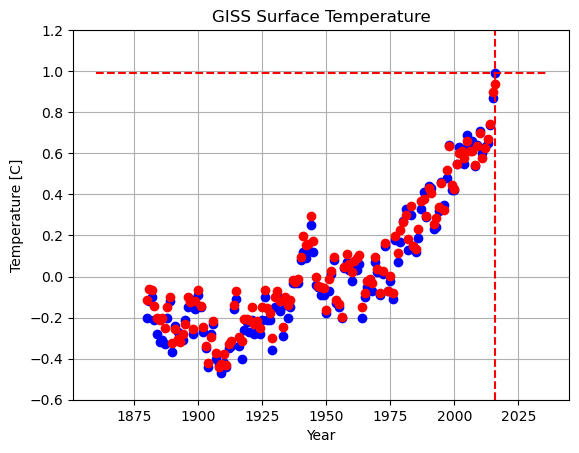

In [6]:
# create a figure and axis
fig, ax = plt.subplots()

min_y = -0.6 
max_y = 1.2

# scatter plot
ax.scatter(tempGISTEMP['Year'], tempGISTEMP['Mean'],c='b')
ax.scatter(tempGCAG['Year'], tempGCAG['Mean'],c='r')
ax.vlines(tempGISTEMP['Year'][tempGISTEMP['Mean'].idxmax()],min_y,max_y, colors='r', linestyles="dashed")
ax.hlines(tempGISTEMP['Mean'].max(),tempGISTEMP['Year'].min()-20,tempGISTEMP['Year'].max()+20, colors='r', linestyles="dashed")

# set a title and labels
#Titulo
ax.set_title('GISS Surface Temperature')
#Etiqueta del exe X
ax.set_xlabel('Year')
#Etiqueta del exe Y
ax.set_ylabel('Temperature [C]')

ax.set_ylim([min_y, max_y])
ax.grid()
ax.set_axisbelow(True)


### Line plot

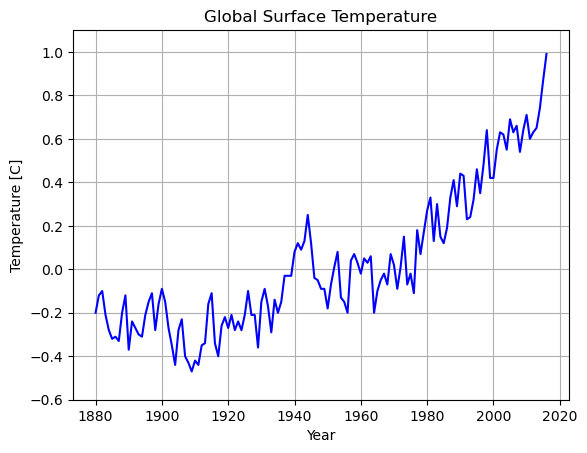

In [7]:
# create a figure and axis
fig, ax = plt.subplots()

# line plot
line1, = ax.plot(tempGISTEMP['Year'], tempGISTEMP['Mean'],c='b')
#line2, = ax.plot(tempGCAG['Year'], tempGCAG['Mean'],c='r',marker='o')
#ax.legend([line1, line2], ['GISTEMP', 'GCAG'])

# set a title and labels
#Titulo
ax.set_title('Global Surface Temperature')
#Etiqueta del exe X
ax.set_xlabel('Year')
#Etiqueta del exe Y
ax.set_ylabel('Temperature [C]')

ax.set_ylim([-0.6, 1.1])
ax.grid()
ax.set_axisbelow(True)

### Line plot - Log Scale

Ejemplo de evolucion en el tiempo de una funcion exponencial de la forma:

$$ V(t) = V_{0}*e^{-t/RC} $$

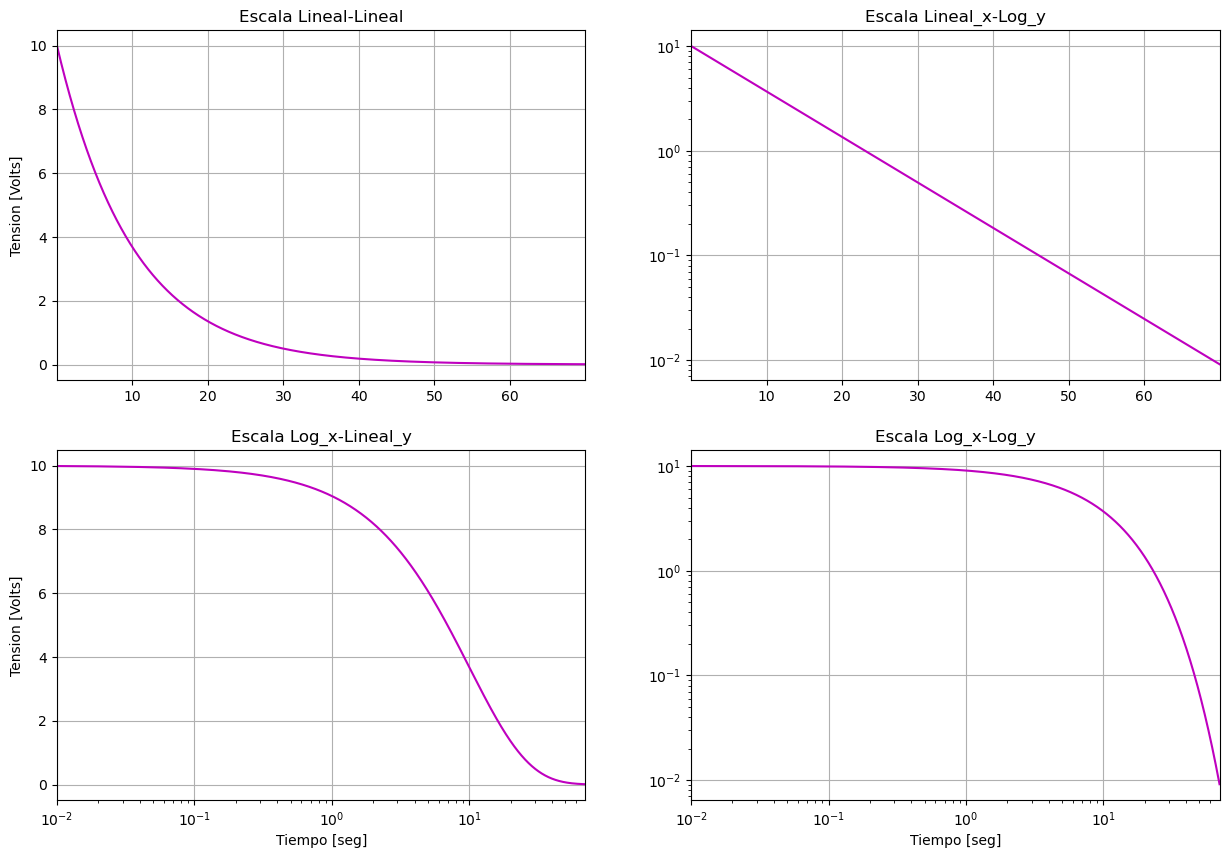

In [9]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, 10)

dt = 0.01
t = np.arange(dt, 70, dt)
R = 10E6 # Resistencia
C = 1E-06 # Capacitancia
V0 = 10 # Tension inicial
V_t = V0*np.exp(-t/(R*C))#/V0

ax[0][0].plot(t, V_t, c='m')
ax[0][0].grid()
ax[0][0].set_title("Escala Lineal-Lineal")
ax[0][0].set_xlabel(" ")
ax[0][0].set_ylabel("Tension [Volts]")
ax[0][0].set_xlim(np.min(t), np.max(t))

ax[1][0].semilogx(t, V_t, c='m', base=10)
ax[1][0].grid()
ax[1][0].set_title("Escala Log_x-Lineal_y")
ax[1][0].set_xlabel("Tiempo [seg]")
ax[1][0].set_ylabel("Tension [Volts]")
ax[1][0].set_xlim(np.min(t), np.max(t))

ax[0][1].semilogy(t, V_t, c='m', base=10)
ax[0][1].grid()
ax[0][1].set_title("Escala Lineal_x-Log_y")
ax[0][1].set_xlabel(" ")
ax[0][1].set_ylabel(" ")
ax[0][1].set_xlim(np.min(t), np.max(t))

ax[1][1].loglog(t, V_t, c='m')
ax[1][1].grid()
ax[1][1].set_title("Escala Log_x-Log_y")
ax[1][1].set_xlabel("Tiempo [seg]")
ax[1][1].set_ylabel(" ")
ax[1][1].set_xlim(np.min(t), np.max(t))

plt.show()

### Histogram

#### Dataset de medidas fisiologicas durante examanes

Source: https://physionet.org/content/wearable-exam-stress/1.0.0/

In [10]:
phys_meas = pd.read_csv('./external_data/Data_physio_exams/S1/Final/IBI.csv', header=0,names = ['time','IBI']) 
print(phys_meas.head(10))
print(phys_meas['IBI'].max())
print(phys_meas['IBI'].min())

         time       IBI
0   84.847634  0.468771
1   85.347657  0.500023
2   85.722674  0.375017
3  107.754932  0.437520
4  108.223704  0.468771
5  108.645598  0.421894
6  109.114370  0.468771
7  109.520638  0.406269
8  109.989410  0.468771
9  110.442555  0.453146
1.062549
0.32814


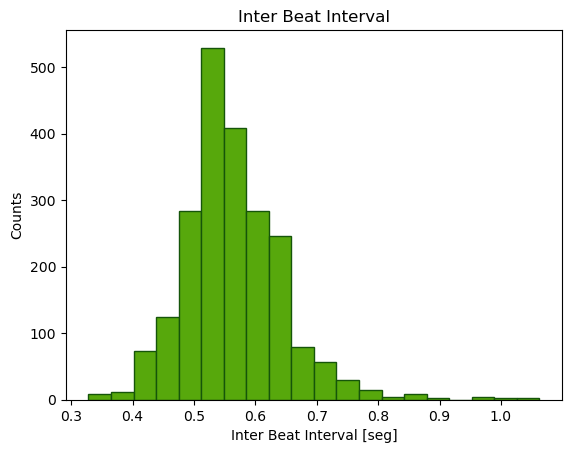

In [13]:
# create figure and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(phys_meas['IBI'], color="#57A80C", bins=20, edgecolor = "#15550A")

# set title and labels
ax.set_title('Inter Beat Interval')
ax.set_xlabel('Inter Beat Interval [seg]')
ax.set_ylabel('Counts')

plt.show()

### Bar plot

In [15]:
phys_meas = pd.read_csv('./external_data/Data_physio_exams/S5/Final/HR.csv', header=0,names=['HR']) 
print(phys_meas.head(10)) 
print(phys_meas['HR'][1:].max())
print(phys_meas['HR'][1:].min())

#limits HR
lowHR = 60
highHR = 100
phys_meas['range'] = "Normal"
phys_meas['range'][phys_meas['HR']>highHR] = "High"
phys_meas['range'][phys_meas['HR']<lowHR] = "Low"

       HR
0    1.00
1  118.00
2   84.50
3   97.67
4   85.25
5   97.80
6   94.83
7  104.14
8  103.38
9  103.56
139.68
56.38


/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_20404/3589669874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phys_meas['range'][phys_meas['HR']>highHR] = "High"
/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_20404/3589669874.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phys_meas['range'][phys_meas['HR']<lowHR] = "Low"


Text(0, 0.5, 'Frequency [%]')

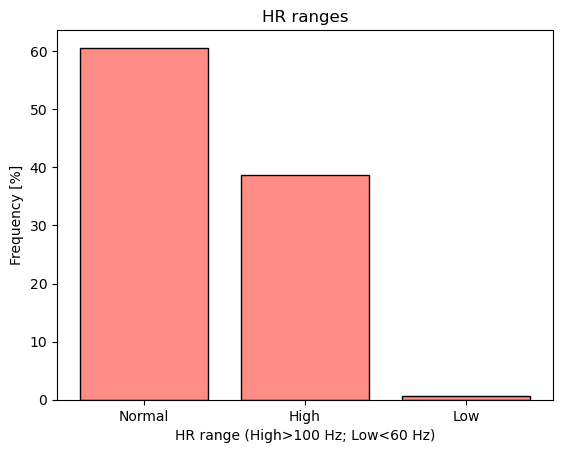

In [16]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
dataCounts = phys_meas['range'].value_counts()
# get x and y data 
ranges = dataCounts.index 
frequency = dataCounts.values/dataCounts.values.sum()*100

# create bar chart 
ax.bar(ranges, frequency, color="#FF8D85", edgecolor="black") 
# set title and labels 
ax.set_title('HR ranges') 
ax.set_xlabel('HR range (High>100 Hz; Low<60 Hz)') 
ax.set_ylabel('Frequency [%]')

### Topoplots

Link: https://mne.tools/stable/auto_examples/visualization/evoked_topomap.html